In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [146]:
df = pd.read_csv('spotify-2023.csv', encoding="ISO-8859-1")

In [147]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [149]:
# La columna "streams" no se asigna automaticamente como numerico. Usemos esta funcion para averiguarlo.
non_numeric_values = df.loc[~df['streams'].str.isnumeric(), 'streams'].unique()
print(non_numeric_values)

['BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3']


In [150]:
# Encuentra el índice de la fila que contiene el valor no numérico
index_to_drop = df.loc[~df['streams'].str.isnumeric()].index
print(index_to_drop)
# Eliminamos la fila con el error
df = df.drop(index_to_drop)

Int64Index([574], dtype='int64')


In [151]:
#Convertimos a numerico la columna 'streams'
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

In [152]:
df['streams'].info()

<class 'pandas.core.series.Series'>
Int64Index: 952 entries, 0 to 952
Series name: streams
Non-Null Count  Dtype
--------------  -----
952 non-null    int64
dtypes: int64(1)
memory usage: 14.9 KB


In [153]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,9.520000e+02,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,1.556723,2018.288866,6.038866,13.944328,5202.565126,12.022059,5.141374e+08,67.866597,51.963235,2.669118,122.553571,66.984244,51.406513,64.274160,27.078782,1.582983,18.214286,10.138655
std,0.893331,11.011397,3.564571,9.197223,7901.400683,19.582405,5.668569e+08,86.470591,50.628850,6.038152,28.069601,14.631282,23.480526,16.558517,26.001599,8.414064,13.718374,9.915399
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,874.500000,0.000000,1.416362e+08,13.000000,7.000000,0.000000,99.750000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2216.500000,3.000000,2.905309e+08,34.000000,38.500000,0.000000,121.000000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5573.750000,16.000000,6.738690e+08,88.000000,87.000000,2.000000,140.250000,78.000000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,58.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


# Data Analisis

### Canciones con más reproducciones

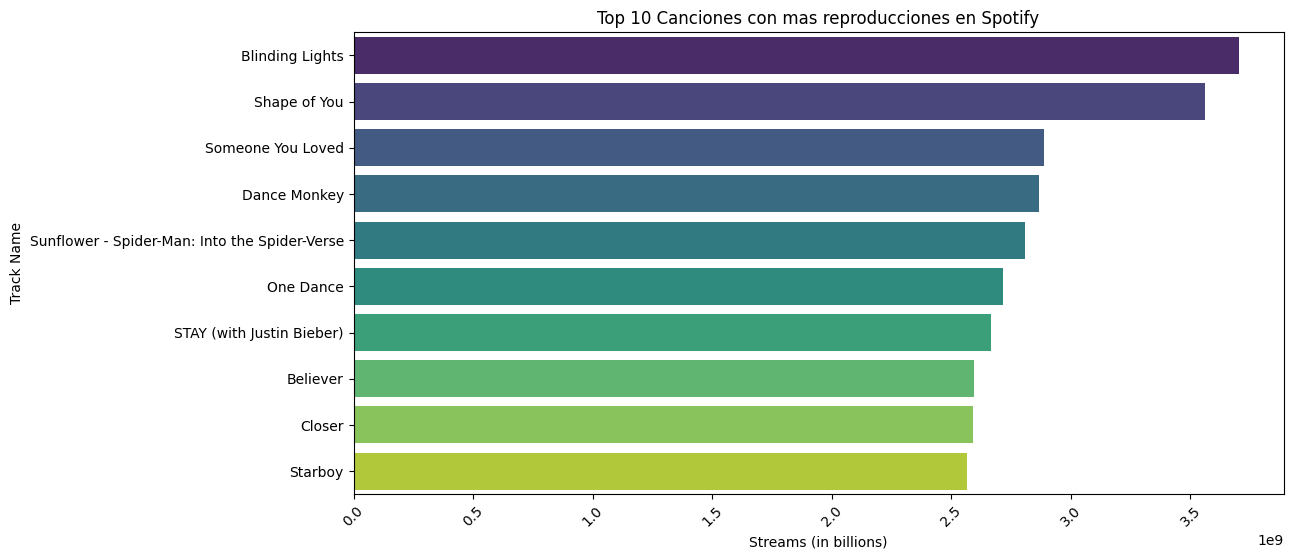

,track_name,artist(s)_name,streams
55,Blinding Lights,The Weeknd,3703895074
179,Shape of You,Ed Sheeran,3562543890
86,Someone You Loved,Lewis Capaldi,2887241814
620,Dance Monkey,Tones and I,2864791672
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2808096550
162,One Dance,"Drake, WizKid, Kyla",2713922350
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2665343922
140,Believer,Imagine Dragons,2594040133
725,Closer,"The Chainsmokers, Halsey",2591224264
48,Starboy,"The Weeknd, Daft Punk",2565529693


In [155]:
top_spotify_streams = df[['track_name', 'artist(s)_name', 'streams']].sort_values(by='streams', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_spotify_streams['streams'], y=top_spotify_streams['track_name'], palette='viridis')
plt.xlabel('Streams (in billions)')
plt.ylabel('Track Name')
plt.title('Top 10 Canciones con mas reproducciones en Spotify')
plt.xticks(rotation=45)
plt.show()

top_spotify_streams

### Media de streams por años

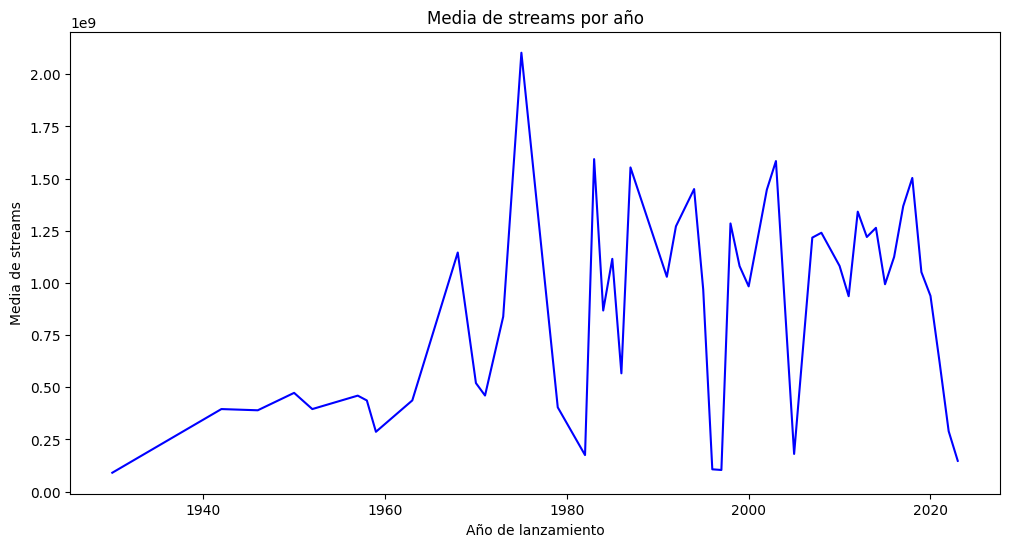

In [156]:
# Grafico de la media de streams por año
media_streams_por_anio = df.groupby('released_year')['streams'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=media_streams_por_anio.index, y=media_streams_por_anio.values, color='blue')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Media de streams')
plt.title('Media de streams por año')
plt.show()

### Musical Features


In [157]:
columnas = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
medias = df[columnas].mean()
df_medias = pd.DataFrame(medias, columns=['Media'])
print(df_medias)

                         Media
bpm                 122.553571
danceability_%       66.984244
valence_%            51.406513
energy_%             64.274160
acousticness_%       27.078782
instrumentalness_%    1.582983
liveness_%           18.214286
speechiness_%        10.138655


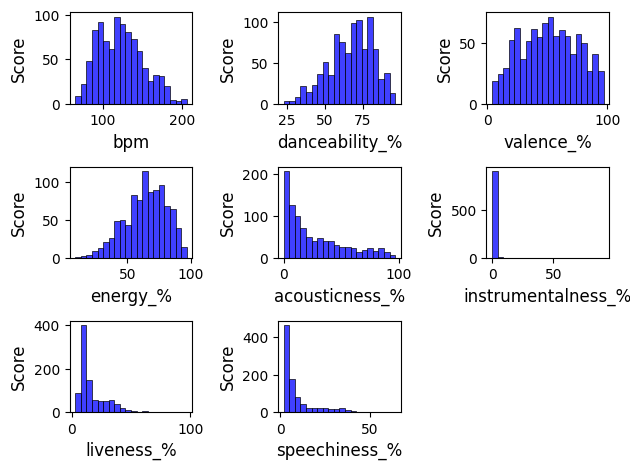

In [158]:
columns_to_plot = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=column, bins=20, color='blue')
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Score", fontsize=12)

plt.tight_layout()
plt.show()

### Lanzamientos por año

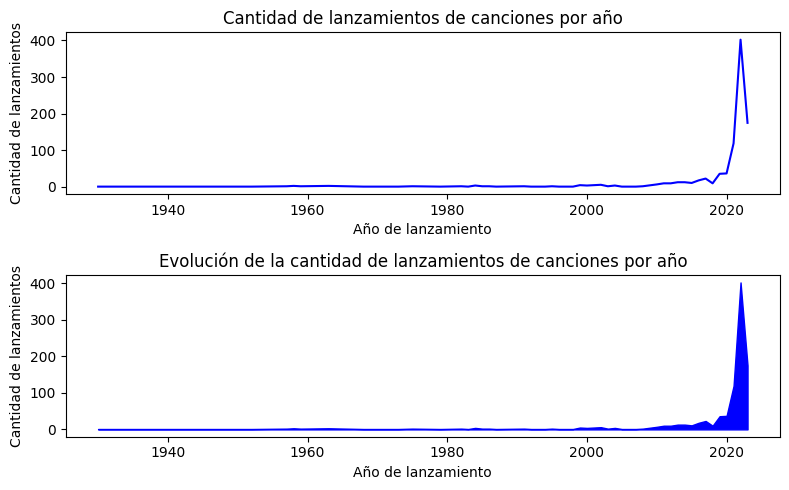

In [167]:
lanzamientos_por_anio = df.groupby('released_year').size()

# Crea una figura con dos subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 5))

# Gráfico de líneas
axs[0].plot(lanzamientos_por_anio.index, lanzamientos_por_anio.values, color='blue')
axs[0].set_xlabel('Año de lanzamiento')
axs[0].set_ylabel('Cantidad de lanzamientos')
axs[0].set_title('Cantidad de lanzamientos de canciones por año')

# Gráfico de área
axs[1].fill_between(lanzamientos_por_anio.index, lanzamientos_por_anio.values, color='blue')
axs[1].set_xlabel('Año de lanzamiento')
axs[1].set_ylabel('Cantidad de lanzamientos')
axs[1].set_title('Evolución de la cantidad de lanzamientos de canciones por año')

# Ajusta los subplots y muestra la figura
plt.tight_layout()
plt.show()

### Lanzamientos según los días de la semana y meses del año

In [160]:
df["fecha"] = df.apply(lambda row: datetime.datetime(row["released_year"], row["released_month"], row["released_day"]), axis=1)

In [161]:
# Asegúrate de que la columna 'fecha' esté en formato de fecha
df['fecha'] = pd.to_datetime(df['fecha'])

# Crea una tabla de relación que asocie las fechas con los nombres de los días de la semana
df['dia_semana'] = df['fecha'].dt.strftime('%A')

# Luego, crea la tabla pivote con los nombres de los días de la semana
tabla_pivote = df.pivot_table(index='dia_semana', columns='released_month', values='track_name', aggfunc='count')

# Calcula los totales por fila y columna
filas_totales = tabla_pivote.sum(axis=1)
columnas_totales = tabla_pivote.sum(axis=0)

# Crea una copia de la tabla pivote llamado tabla_pivote_totales y agrega los totales
tabla_pivote_totales = tabla_pivote.copy()
tabla_pivote_totales['Total por Mes'] = filas_totales
tabla_pivote_totales.loc['Total por Día'] = columnas_totales
tabla_pivote_totales


released_month,1,2,3,4,5,6,7,8,9,10,11,12,Total por Mes
dia_semana,,,,,,,,,,,,,
Friday,50.0,30.0,48.0,36.0,90.0,52.0,37.0,26.0,23.0,44.0,41.0,49.0,526.0
Monday,7.0,4.0,4.0,5.0,10.0,2.0,3.0,6.0,3.0,9.0,5.0,2.0,60.0
Saturday,9.0,4.0,4.0,NaN,2.0,NaN,NaN,1.0,NaN,1.0,1.0,1.0,23.0
Sunday,13.0,4.0,NaN,2.0,5.0,1.0,2.0,3.0,NaN,NaN,7.0,NaN,37.0
Thursday,14.0,8.0,20.0,9.0,12.0,23.0,9.0,6.0,14.0,8.0,17.0,14.0,154.0
Tuesday,20.0,6.0,3.0,5.0,5.0,1.0,5.0,4.0,8.0,3.0,3.0,2.0,65.0
Wednesday,20.0,5.0,7.0,9.0,4.0,7.0,6.0,NaN,8.0,8.0,6.0,7.0,87.0
Total por Día,133.0,61.0,86.0,66.0,128.0,86.0,62.0,46.0,56.0,73.0,80.0,75.0,NaN


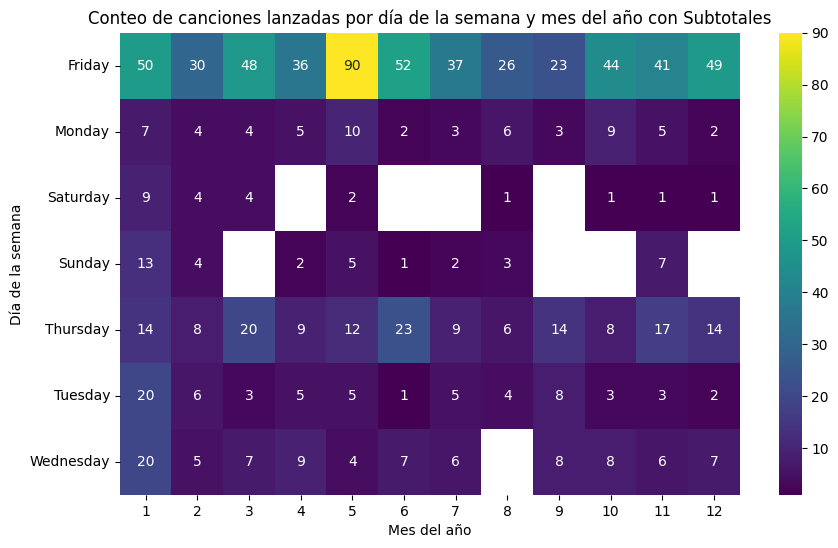

In [162]:
# Crea el mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(tabla_pivote, cmap='viridis', annot=True, fmt='g')

plt.xlabel('Mes del año')
plt.ylabel('Día de la semana')
plt.title('Conteo de canciones lanzadas por día de la semana y mes del año con Subtotales')

plt.show()

### Diferencia relativa de la canción más popular con respecto al promedio

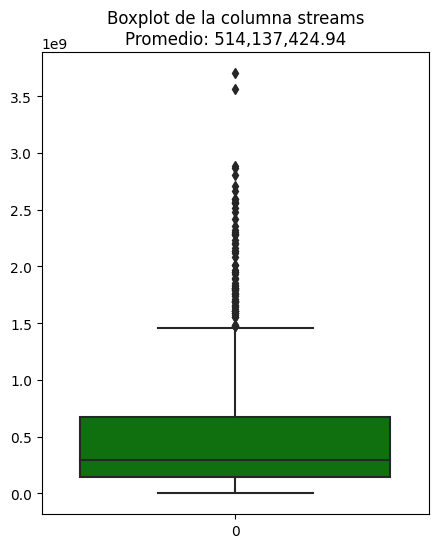

In [163]:
promedio_streams = df['streams'].mean()
promedio_streams_str = '{:,.2f}'.format(promedio_streams)
plt.figure(figsize=(5, 6))
sns.boxplot(df['streams'], color='green')
plt.title(f'Boxplot de la columna streams\nPromedio: {promedio_streams_str}')
plt.show()

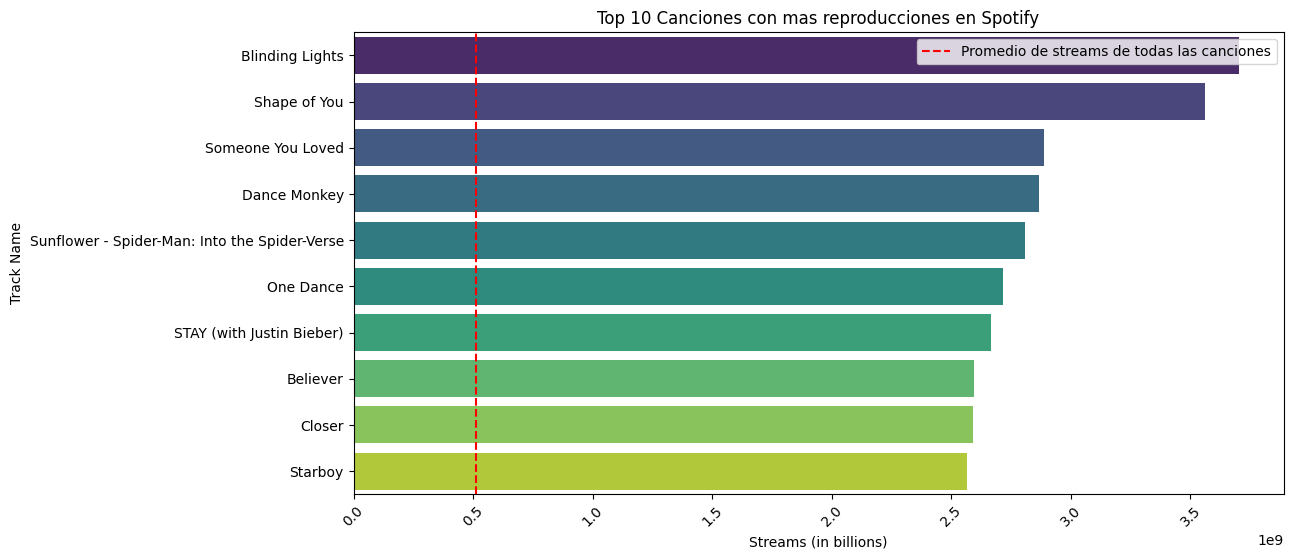

In [164]:
top_spotify_streams = df[['track_name', 'artist(s)_name', 'streams']].sort_values(by='streams', ascending=False).head(10)
promedio_streams = df['streams'].mean()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_spotify_streams['streams'], y=top_spotify_streams['track_name'], palette='viridis')
plt.axvline(x=promedio_streams, color='red', linestyle='--', label='Promedio de streams de todas las canciones')
plt.xlabel('Streams (in billions)')
plt.ylabel('Track Name')
plt.title('Top 10 Canciones con mas reproducciones en Spotify')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Diferencia relativa de la canción más popular con respecto al promedio en porcentaje

In [165]:
# Calcula la media de streams de todas las canciones
media_streams = df['streams'].mean()

# Calcula la media de streams de las 10 canciones más populares
media_top_10 = df.nlargest(10, 'streams')['streams'].mean()

# Calcula el porcentaje de diferencia para cada canción del top 10
top_10_porcentaje_diferencia = (top_spotify_streams['streams'] - media_streams) / media_streams * 100
print("")
top_10_porcentaje_diferencia


55     620.409543
179    592.916663
86     461.570054
620    457.203489
41     446.176258
162    427.859327
84     418.410797
140    404.542172
725    403.994484
48     398.996877
Name: streams, dtype: float64

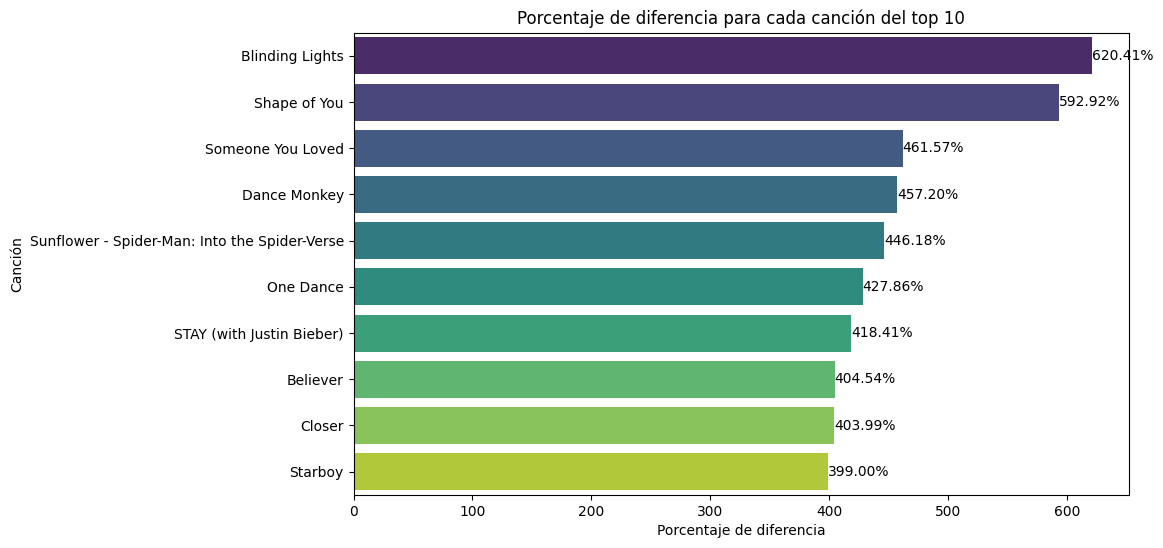

In [166]:

# Crea el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_porcentaje_diferencia, y=top_spotify_streams['track_name'], palette='viridis')
plt.xlabel('Porcentaje de diferencia')
plt.ylabel('Canción')
plt.title('Porcentaje de diferencia para cada canción del top 10')

# Agrega el valor numérico en las barras
for i, v in enumerate(top_10_porcentaje_diferencia):
    plt.text(v, i, f'{v:.2f}%', color='black', va='center')

plt.show()

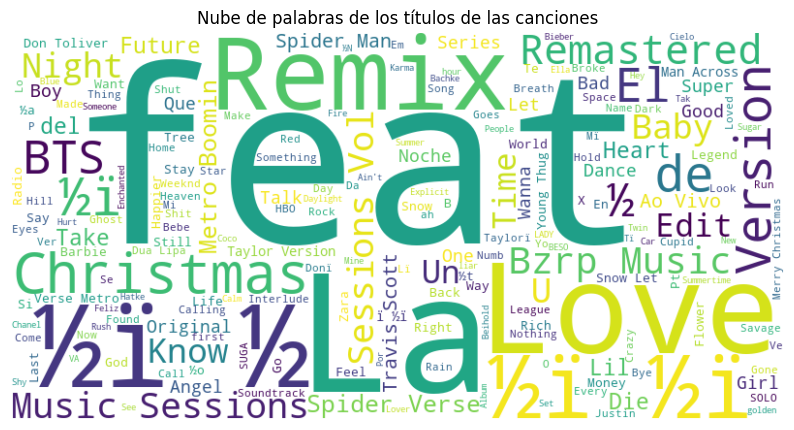

In [168]:
from wordcloud import WordCloud

# Obtén una lista de todos los títulos de las canciones
titulos = df['track_name'].tolist()

# Une todos los títulos en un solo string
text = ' '.join(titulos)

# Crea la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Muestra la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras de los títulos de las canciones')
plt.show()
